# Data Science Music Project Report: What Makes Songs So Catchy?

Author: Justine Huynh

Date: 2020 December 15

## Introduction

Music has been around the world for a very long time. Most people have musical inclinations or musical preferrences for one song over another. Some songs are so beautiful that they become roaring popular. But what makes a song so musically pleasing? The aim of this report is to find the most important audio characteristics of a song that make it so popular. This report will first look at the web-scraping journey to scrape music data from the Ultimate Music Database and Album Of The Year to create an organized dataframe that lists the song's characteristics and whether the song was listed in the top 100 of the week (AKA a "hit") in the UK. Afterwards, I graphed some data visualizations to see if there were any intriguing relationships among the audio characteristics. Finally, I performed some machine learning models on the data to see, given a song's audio characteristics, will this song be considered a hit when it first starts premierring?

## Background And Problem

Songs (AKA tracks) have unique musical qualities. Some audio characteristics include: the key the song was written in, whether it was written in Major or minor key, how danceable the song is, the probability that the song is an instrumental, etc. The aim of this report is to see what are the major audio characteristics of a song that determine whether the song becomes a hit in the UK when it is first released? The report will also attempt to see any relationships among the audio factors.

In summary, this report saw that the most important audio features of a song (besides popularity) is track number, instrumentalness (how probable the song is instrumental), and danceability (how suitable the song is for dancing).

## Data

I first used the `Beautiful Soup` module to scrape datatables from the website Ultimate Music Database. Ultimate Music Database (UMD) is a database that has an "(almost) complete database" of popular music. UMD shows top singles and top albums in multiple regions such as the UK, Luxembourg, etc for multiple years. The way UMD is set up is that, for a specific region (say, the UK), each webpage lists the top 100 songs in the UK for 1 particular week. UMD lists the top 100 songs for that particular region throughout all weeks of the year. In this report, I chose to scrape the top 100 songs each week from the year 2019 all the way to October of 2020 (as end of October was the first time I started scraping the UMD and forming a dataframe) from the region the UK specifically.

The problem with song rankings is that songs tend to be "sticky." A song that was really popular last week will most likely still be really popular in the future weeks. In short, previous placements indicate future placements, which can change the data into a time-series data fraught with messy autocorrelation errors. To prevent autoicorrelation errors, I scraped only the new songs that came out in that week, thus focusing on factors that affect whether a song becomes one of the top 100 ranked songs in the UK when it first starts premierring. I labelled all these songs from UMD with the binary variable `isHit = 1`, a "positive" case.

As with such classification problems, I needed data for "negative" cases, or songs who never made it into the list of the top 100 songs in the UK. I looked into Album Of The Year (AOTY), a website that featured all the songs/albums that came out in 2020. I made sure to grab only the songs that were not included in UK's top 100 songs from 2019 to 2020, then labelling them with the binary variable `isHit = 0`. 

After grabbing all the songs from each database, I used the `Spotipy` API to search up each song and write down their audio characteristics, such as: key, mode (whether the song was written in major key or minor key), how danceable the song is, tempo, energy (how fast and loud the song is), valence (how positive/happy the song sounded), etc. I slowly built a huge dataframe of songs and their audio characteristics, row by row.

A few slight problems was that `Spotipy` did not have all the songs in their inventory, so I could not search up audio features in one song; therefore, I had to drop those songs. However, most of the songs I scraped existed in `Spotipy` inventory. Furthermore, the good thing about `Spotipy` was that, if it had a song in its inventory, then it will have all the audio characteristics I needed.

I included many audio features for each song I scraped. However, I will be showing only the variables of interest, the most important variables I discovered after machine learning analysis, down below.

### Variables Of Interest

- duration_ms: the duration of the track, in miliseconds
- danceability: how suitable a track is for dancing, based on musical elements such as: tempo, rhythm, beat strength, regularity; values near 0 mean the track is not suitable for dancing while values near 1 mean the track is most danceable.
- instrumentalness: the probability a track is instrumental (has no vocals); Values near 0 mean the track is most likely not instrumental while values near 1 mean the track is most likely instrumental
- tempo: the speed of the song, measured in beats per minute (BPM)
- speechiness: measures the probability of a track containing entirely spoken words; values close to 1 means that the song most likely has spoken words and no music; values close to 0 means that the song most likely has no speech, only music.
- track number: the position of the track in the album; 1 means that the song is first in the album, 2 means that the song is the second in the album, etc.
- popularity: based on the number of streams the song was played in a specified, short timeframe (from 0 to 100); very high indicator of whether a song became a "hit" in the UK or not


## Analysis

I first split my data into training and test datasets and further subdividing into whether they were the audio characteristics (X, or independent variables) or the classification outcome (Y, or dependent variable). I planned to run a few classification models on my data and train them to classify correctly. The reason for splitting is simply because I do not want my model to overfit my data. Although my model may classify my data very well, overfitting means that my model is too specific for my data. If I overfit my model, and then test my model on a new, different dataset, my overfitted model will perform poorly. 

After splitting the data, I ran a seamless pipeline that included preprocessing and testing different machine learning models on my data. Since I did not know which classification model would be best, I tested 4 different classification models: Gaussian Naive Bayes, K Nearest Neighbors Classifier, Decision Tree Classifier, and Random Forest Classifier. Gaussian Naive Bayes is a classification model that classifies data using the Bayes Theorem. In short, given these independent variables (audio features of a song, in this case), what is the probability that the dependent variable is true (the song is a hit, in this case). K Nearest Neighbors Classifier tries to find clusters of data (it's "neighbors") and attempts to classify a new observation by finding the most common class among that cluster. Decision tree classifiers learns simple decision rules from data to classify data. They try to split the features in such a way that the resulting groups are as different from each other as possible, yet the observations in each group are as similar as possible. Random Forest Classifiers use many different decision tree models that work together as an ensemble (or a forest). They use the power of crowds to see which prediction/classification is the most popular among the individual decision trees in the ensemble. 

I used preprocessing using MinMaxScaler to scale and standardize my data, then ran various models. A seamless pipeline not only lets me test different parameters (such as: leaf size in K Nearest Neighbors, max depth of a decision tree, number of estimators ("trees") in a random forest classifier, etc.) but also provides a smooth transition to do so. Specifically, grid search helped me search which tuning parameters were best to maximize classification accuracy. Grid search tests different combination of parameters and will save a model for each parameter combination; as a result, grid search can be computationally expensive if testing many different combinations of parameters. To finish this pipeline, I tried fitting the training dataset; in other words, I tested my model on the training dataset to see how well it will perform.

I tested my classification performance using the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. ROC is a probability curve that offers a visual representation of model performance across different potential thresholds; it looks like a curvey logarithmic curve. AUC represents the magnitude of the separability, or how well the model can differentiate between the 2 cases. The closer AUC is to 1, the more likely the classification model could differentiate between songs who were a hit and songs who were not. If AUC is 0.7, for instance, the classification model can accurately distinguish between positive and negative cases 70% of the time. 

Then, I used permutation to determine the most important factors for classification. Permutation chooses 1 variable to scramble randomly while keeping all other variables the same. Then, it judges how well the classification model performs. This permutation process repeats for all the other variables in the model until every variable had their chance to be scrambled. If the model performs poorly (the AUC decreases), then we can assume that the variable is important. Nevertheless, if the model's performance does not drop by a significant amount, then that means the variable is not very important for classification. If that variable is not important, then no matter how much the variable can be scrambled beyond compare, it will not decrease the classification performance.

## Results

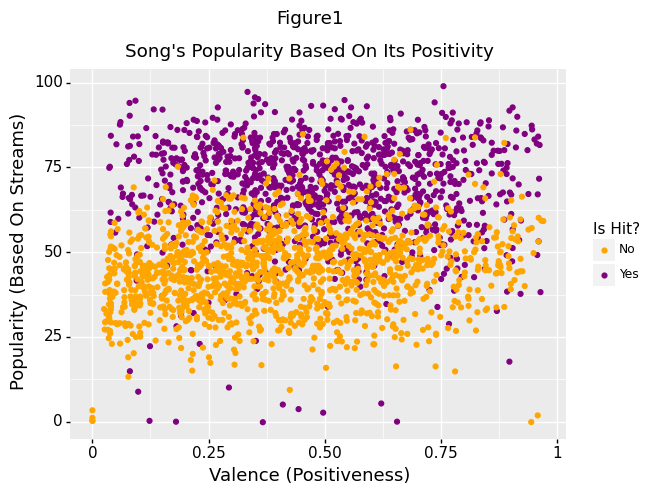

In [18]:
from IPython.display import Image
Image(filename = "Popularity_Vs_Valence.png", height = 600, width = 600)

According to the above graph, valence does not seem to affect whether a song becomes a hit or not. Nevertheless, there appears to be a strong correlation between popularity and whether a song is a hit in the UK. Generally, if a song's popularity is below approximately 65, then the song is most likely not a hit; above 65, most likely a hit. However, as stated before, popularity is determined by the audience. We want to know the song's characteristics (as created by the artist) that affect whether a song becomes a hit or not.

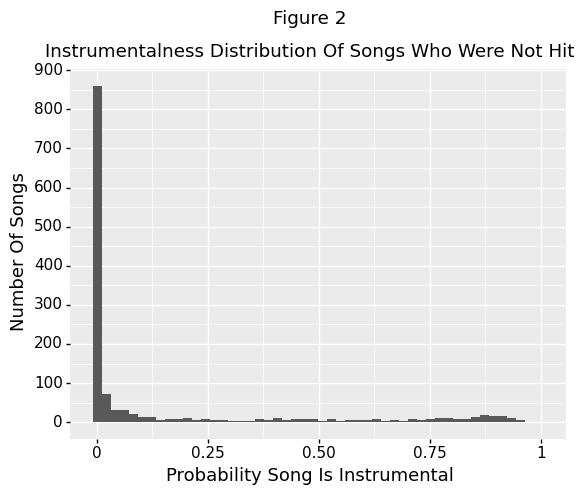

In [19]:
# from IPython.display import Image
Image(filename = "Instrumental_Distribute_NonHitSongs.png", height = 600, width = 600)

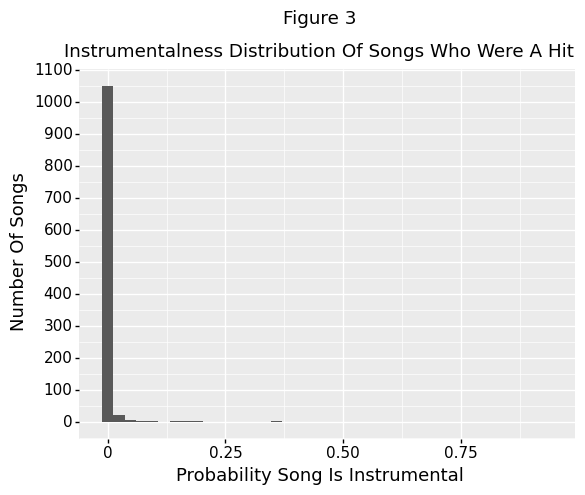

In [31]:
# from IPython.display import Image
Image(filename = "Instrumental_Distribute_HitSongs.png", height = 600, width = 600)

According to these 2 histogram graphs, it appears that the instrumental distribution for songs who were a hit is more skewed right than songs who were not a hit. There were more non-instrumental songs who became hits than songs who were not hits. In short, it appears that songs who were not instrumental have a higher chance of becoming a hit than songs who are instrumental. Lack of instrumentalness may be the key for a song to become a hit.

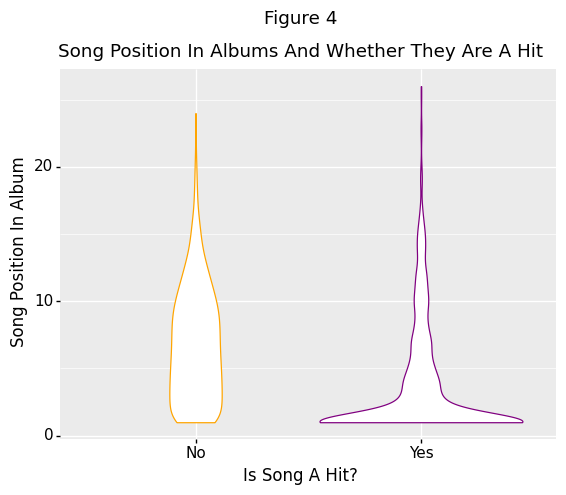

In [21]:
# from IPython.display import Image
Image(filename = "Track_Number_isHit.png", height = 600, width = 600)

The next graph Figure 4 plots the violin densities of a song's position in the album (or track number) and differentiates the densities based on color. It appears that a lot of the songs who were a hit were positioned near the beginning of the album while the distribution of track numbers for the non-hit songs is more spread out. This makes intuitive sense--artists want to capture their listener's attention when they first listen to the album. If the first song is unappealing, listeners are less encouraged to take the time to listen to the whole album; if, however, the first few songs are greatly appealing, then the listeners are more encouraged to listen to the rest of the album.

## Machine Learning Models

After running the multiple classification models on my data, I discovered that the best model was Random Forest Classifier, with a max depth of 5 and 2000 estimators (or trees in the forest). Its AUC score was 84.13% and accuracy score was 84.3% with a mean squared error of 0.157.

Partial Dependency plots analyzes the relationship between the prediction and the chosen features and sees how does the prediction change when the feature changes.

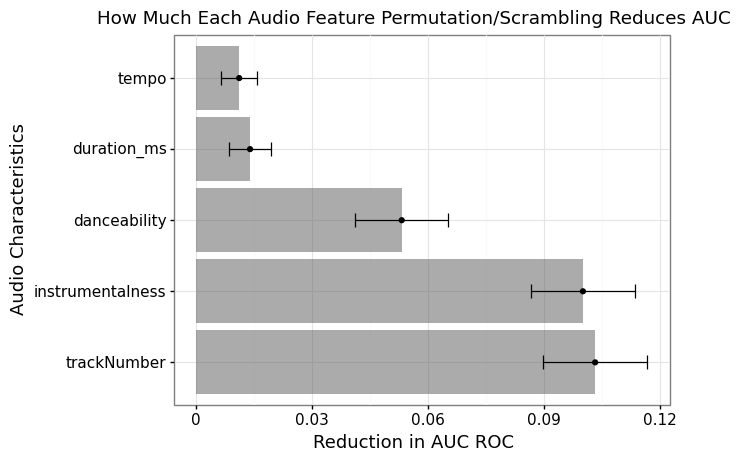

In [47]:
Image(filename = "Important_Variables.png", width = 700)

The top 5 important variables in determining whether a song becomes a hit are: track number, instrumentalness, danceability, duration, and tempo. Duration and tempo, although ranked 4 and 5, do not reduce the AUC ROC as much. Note that track number and instrumentalness reduce the AUC ROC at around the same amount, thus indicating similar importantance.

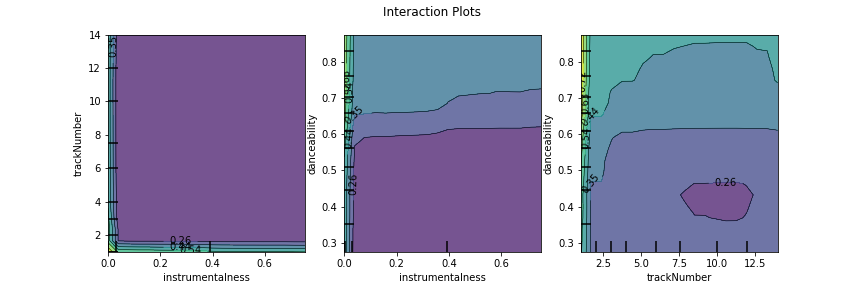

In [52]:
Image(filename = "Interaction_Plots.png", width = 800)

In these interaction plots, intensity of the heatmap-like plots corresponds to the prediction. Lighter colors mean a higher predictive accuracy. It appears that there is little interaction between track number and instrumentalness. However, it appears that a song is more likely to become a hit the higher its danceability. Furthermore, it appears that a song is most likely to become a hit if its position in an album is near the beginning and is quite danceable. However, these relationships could be a correlation, not causation.

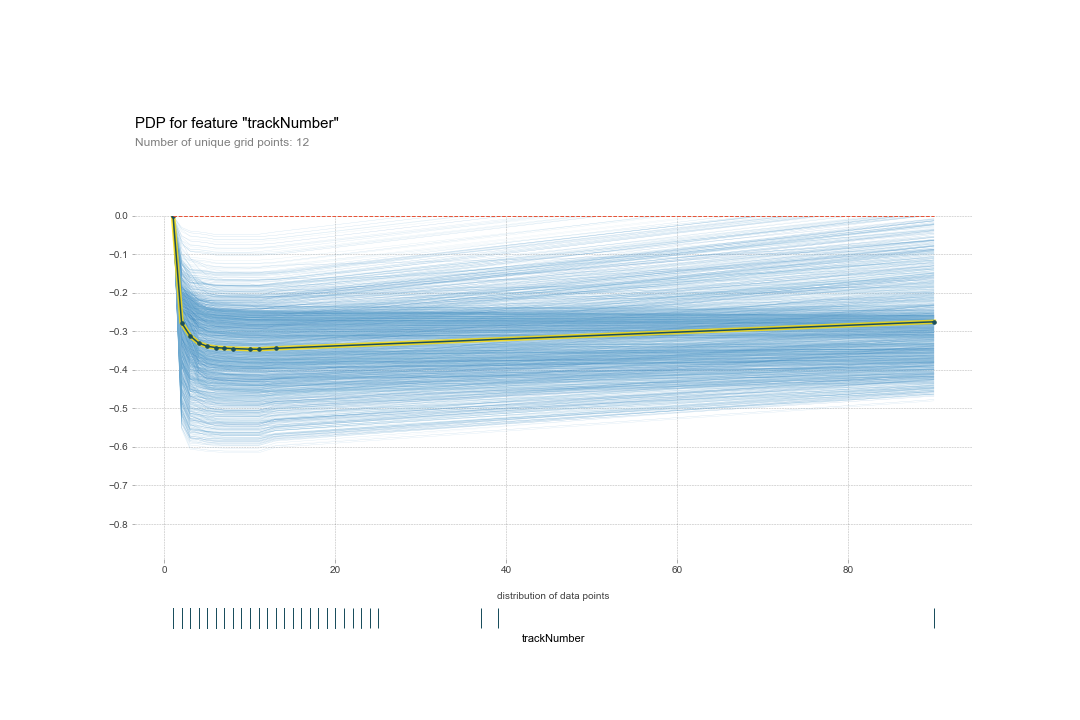

In [56]:
Image(filename = "PDP_trackNumber.png", width = 700)

## Discussion

I have completed this data science project journey with a success. I was able to visualize the interesting relationships among the factors. Most importantly, I was able to determine which factors are considered the most important in predicting whether a song will be a hit or not. The top 5 important factors were: track number, instrumentalness, danceability, duration, and tempo. 

However, this data science project can have improvements. As I was scraping data, I discovered some songs who had multiple artists. Most of these songs had a main artist and a featured artist. The featured artist was almost always a minor artist who played a minor role in creating this song. The main point of a minor artist being featured in a song is to raise visability of this minor artist, thus helping the artist gain popularity and create more music. Unfortunately, I did not realize this epiphany until much later in the journey. If I had more time, I would have produced another column called "secondary_artist" to account for any featured artists, then visualized a popularity graph to see if the featured artist's songs gained popularity after the artist was featured in another song.

Furthermore, another improvement is to expand this music dataset to include songs who were a hit not just in the UK but in multiple regions. Expanding to include other regions can make my results more robust and more generalizable, not just specifically tied down to one lone region.

## Works Cited

"How do recording artists decide on the order of the songs on their CDs?", *Quora*, https://www.quora.com/How-do-recording-artists-decide-on-the-order-of-the-songs-on-their-CDs. Accessed 12 Dec 2020.